# ECGR 4105-001, Homework 1
## By Joshua Foster, 801268118

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 


### Problem 1:
Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

1. Report the linear model you found for each explanatory variable.
2. Plot the final regression model and loss over the iteration per each explanatory variable.
3. Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
4. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.


In [21]:
# Load dataset
df = pd.read_csv('D3.csv')

# Separate explanatory & dependent variables
X1 = df.iloc[:, 0].values
X2 = df.iloc[:, 1].values
X3 = df.iloc[:, 2].values
Y = df.iloc[:, 3].values

# Reshaping X for matrix operations
X1_b = np.c_[np.ones((X1.shape[0], 1)), X1]  
X2_b = np.c_[np.ones((X2.shape[0], 1)), X2]  
X3_b = np.c_[np.ones((X3.shape[0], 1)), X3]  

In [ ]:
# Cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - Y))
    return cost

def gradient_descent(X, Y, learning_rate, n_iterations):
    m = len(Y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        gradients = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, Y, theta))

    return theta, cost_history

In [23]:
# Training Models

learning_rate = 0.01
n_iterations = 1000

# Train models for each feature
theta1, cost_history1 = gradient_descent(X1_b, Y, learning_rate, n_iterations)
theta2, cost_history2 = gradient_descent(X2_b, Y, learning_rate, n_iterations)
theta3, cost_history3 = gradient_descent(X3_b, Y, learning_rate, n_iterations)

print("Model for X1:")
print(f"Final Model: Y = {theta1[0]:.4f} + {theta1[1]:.4f} * X1")
print(f"Final Loss: {cost_history1[-1]:.4f}\n")

print("Model for X2:")
print(f"Final Model: Y = {theta2[0]:.4f} + {theta2[1]:.4f} * X2")
print(f"Final Loss: {cost_history2[-1]:.4f}\n")

print("Model for X3:")
print(f"Final Model: Y = {theta3[0]:.4f} + {theta3[1]:.4f} * X3")
print(f"Final Loss: {cost_history3[-1]:.4f}\n")

Model for X1:
Final Model: Y = 5.2929 + -1.7912 * X1
Final Loss: 1.0364

Model for X2:
Final Model: Y = 0.6870 + 0.5767 * X2
Final Loss: 3.5997

Model for X3:
Final Model: Y = 2.5912 + -0.4097 * X3
Final Loss: 3.6397



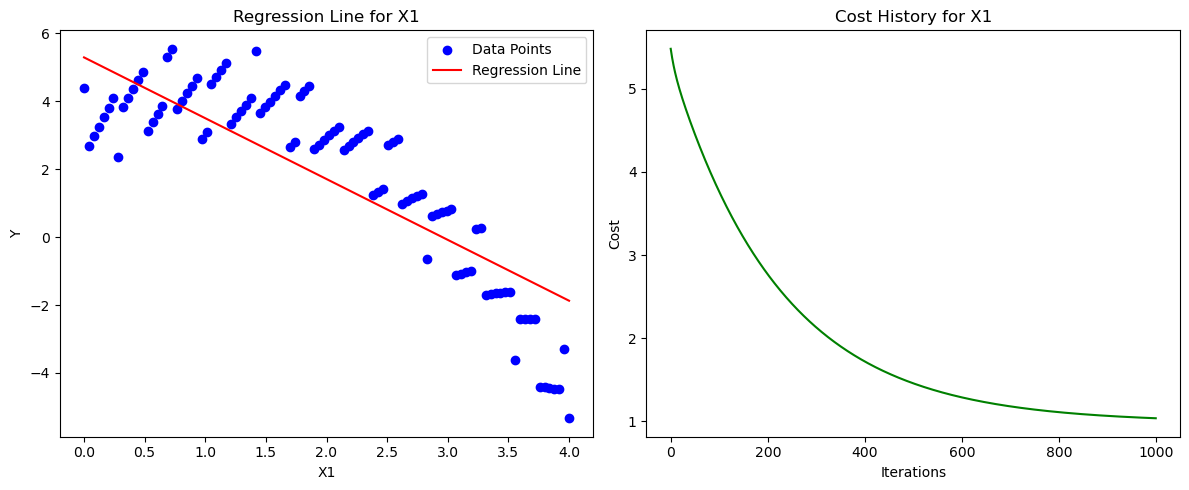

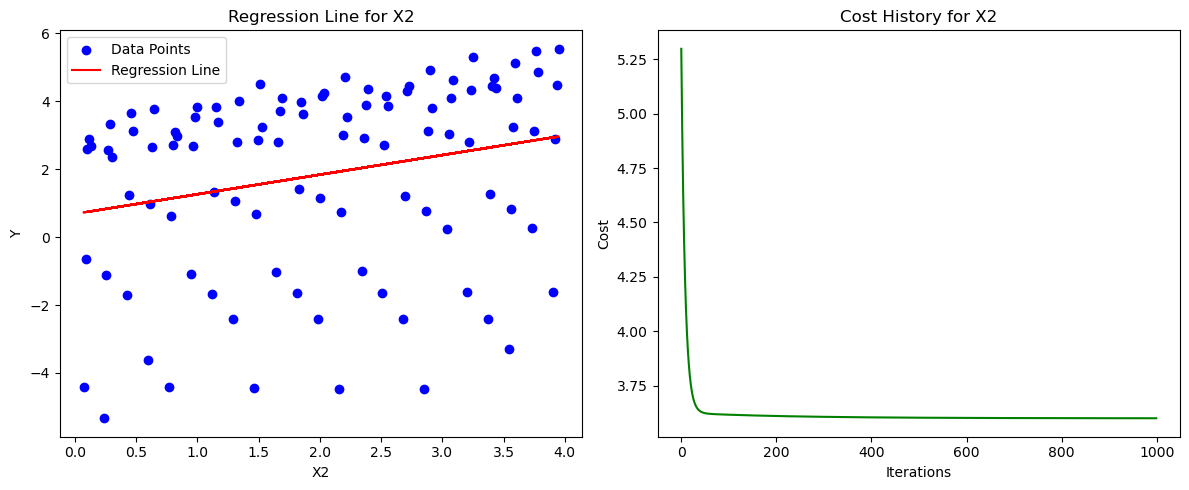

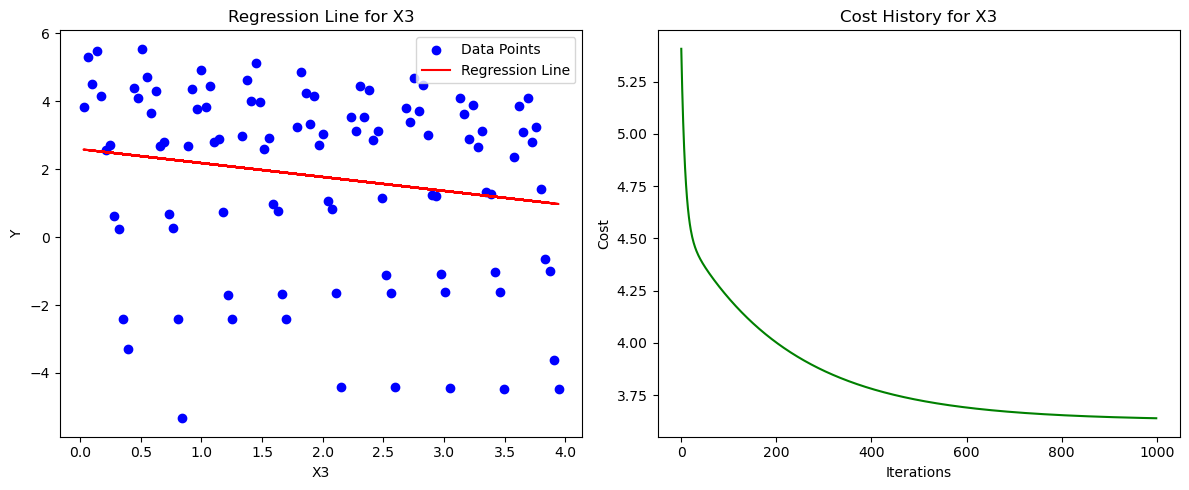

In [24]:
# Plotting Models & Loss

def plot_model_and_loss(X, Y, theta, cost_history, feature_name):
    plt.figure(figsize=(12, 5))

    # Plotting the regression line
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 1], Y, color='blue', label='Data Points')
    plt.plot(X[:, 1], X.dot(theta), color='red', label='Regression Line')
    plt.xlabel(feature_name)
    plt.ylabel('Y')
    plt.title(f'Regression Line for {feature_name}')
    plt.legend()

    # Plotting the cost history
    plt.subplot(1, 2, 2)
    plt.plot(range(len(cost_history)), cost_history, color='green')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost History for {feature_name}')

    plt.tight_layout()
    plt.show()
    
    
plot_model_and_loss(X1_b, Y, theta1, cost_history1, 'X1') 
plot_model_and_loss(X2_b, Y, theta2, cost_history2, 'X2')
plot_model_and_loss(X3_b, Y, theta3, cost_history3, 'X3')

### Problem 2

This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

1. Report the final linear model you found the best. 
2. Plot loss over the iteration.
3. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.
4. Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)


In [25]:
X_multi = df.iloc[:, :3].values
Y = df.iloc[:, 3].values

X_multi_b = np.c_[np.ones((X_multi.shape[0], 1)), X_multi]

In [26]:
def compute_cost_multi(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - Y))
    return cost

def gradient_descent_multi(X, Y, learning_rate, n_iterations):
    m = len(Y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(n_iterations):
        predictions = X.dot(theta)
        errors = predictions - Y
        gradients = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost_multi(X, Y, theta))

    return theta, cost_history

In [27]:
# Train model & find best learning rate

learning_rates = [0.1, 0.05, 0.01]
n_iterations = 1000
results = {}

print("Training Models with Different Learning Rates:")
for lr in learning_rates:
    theta, cost_history = gradient_descent(X_multi_b, Y, lr, n_iterations)
    final_loss = cost_history[-1]
    results[lr] = {'theta': theta, 'cost_history': cost_history, 'final_loss': final_loss}
    print(f"LR = {lr}:> Final Loss = {final_loss:.4f}")
    
best_lr = min(results, key=lambda lr: results[lr]['final_loss'])
best_theta = results[best_lr]['theta']
best_cost_history = results[best_lr]['cost_history']

print(f"\nBest Learning Rate = {best_lr}")

Training Models with Different Learning Rates:
LR = 0.1:> Final Loss = 0.7385
LR = 0.05:> Final Loss = 0.7385
LR = 0.01:> Final Loss = 0.9338

Best Learning Rate = 0.1


Best Final Linear Model:
Model Equation: Y = 5.3139 + -2.0037*X1 + 0.5326*X2 + -0.2656*X3



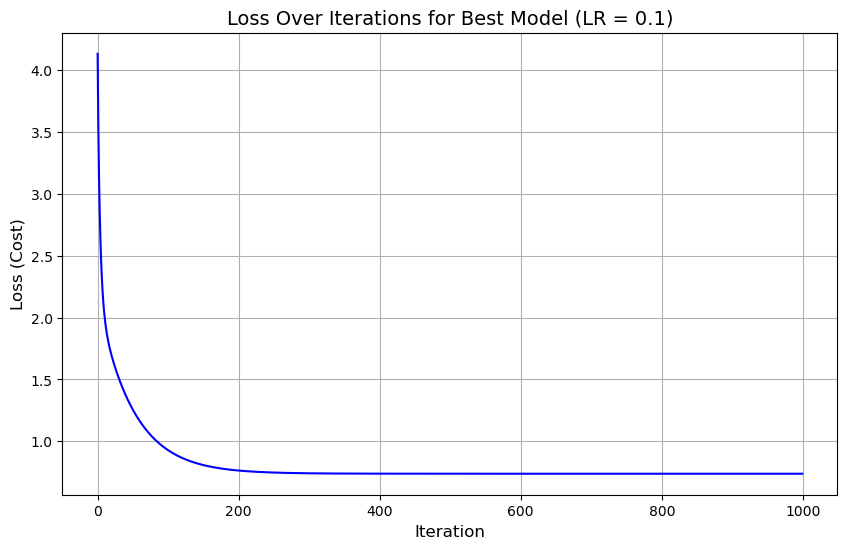

In [28]:
# Reporting and plotting best model
print("Best Final Linear Model:")
print(f"Model Equation: Y = {best_theta[0]:.4f} + {best_theta[1]:.4f}*X1 + {best_theta[2]:.4f}*X2 + {best_theta[3]:.4f}*X3\n")

plt.figure(figsize=(10, 6))
plt.plot(range(n_iterations), best_cost_history, color='blue')
plt.title(f'Loss Over Iterations for Best Model (LR = {best_lr})', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss (Cost)', fontsize=12)
plt.grid(True)
plt.show()

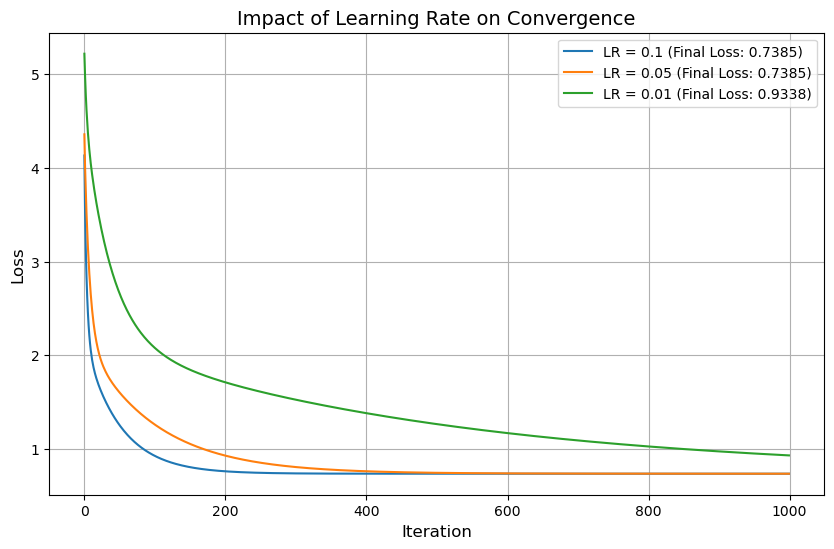

In [29]:
plt.figure(figsize=(10, 6))
for lr, data in results.items():
    plt.plot(range(n_iterations), data['cost_history'], label=f"LR = {lr} (Final Loss: {data['final_loss']:.4f})")

plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Impact of Learning Rate on Convergence", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Predicting new values
new_data = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
new_data_b = np.c_[np.ones((new_data.shape[0], 1)), new_data]
predictions = new_data_b.dot(best_theta)
print("Predictions for New Data:")
for i, pred in enumerate(predictions, 1):
    print(f"Input {i}: {new_data[i-1]} -> Predicted Y: {pred:.4f}")

Predictions for New Data:
Input 1: [1 1 1] -> Predicted Y: 3.5773
Input 2: [2 0 4] -> Predicted Y: 0.2443
Input 3: [3 2 1] -> Predicted Y: 0.1025
